# Merging weather data with parking violations

In [18]:
import pandas as pd
import numpy as np
import json
import requests
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [2]:
#getting station informtion 
data = requests.get("https://api.meteostat.net/v1/history/daily?station=72502&start=2018-04-01&end=2019-03-31&key=APgnBlN9")
data_1= json.loads(data.text)
data = json_normalize(data_1["data"])
data.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,date,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,2018-04-01,10.6,4.4,17.2,NaN,None,NaN,225.0,18.7,None,None,1016.2
1,2018-04-02,4.0,0.0,7.2,14.2,None,100.0,NaN,11.2,None,None,NaN
2,2018-04-03,3.9,1.1,6.1,5.8,None,30.0,NaN,7.9,None,None,NaN
3,2018-04-04,7.8,3.9,13.9,1.5,None,NaN,NaN,25.6,None,None,NaN
4,2018-04-05,4.9,0.6,8.9,0.0,None,NaN,277.0,26.3,None,None,1017.2


In [3]:
data=data[['date','precipitation','temperature','windspeed']]

data=data.fillna(0.0)

data['date']=pd.to_datetime(data["date"], format='%Y-%m-%d', errors='coerce')
data.to_csv("weather_nyc.csv",index=False)

In [6]:
df= pd.read_csv("PARKING2019.csv")

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (9,10,12,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df.head()

,Summons Number,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,...,Violation Post Code,VIOLATION CODE,VIOLATION DESCRIPTION,Manhattan 96th St. & below\n(Fine Amount $),All Other Areas\n(Fine Amount $),Day Name,Day Number,month,Time,Hour
0,1105232165,2018-07-03 00:00:00,14,SDN,HONDA,X,78,968,86684,0968,...,NaN,14.0,NO STANDING-DAY/TIME LIMITS,115.0,115.0,Tuesday,1,7,1900-01-01 20:11:00,20.0
1,1121274900,2018-06-28 00:00:00,46,SDN,NISSA,X,112,968,103419,0968,...,NaN,46.0,DOUBLE PARKING,115.0,115.0,Thursday,3,6,1900-01-01 11:45:00,11.0
2,1130964875,2018-06-08 00:00:00,24,SUBN,JEEP,X,122,835,0,0835,...,NaN,24.0,NO PARKING-EXC. AUTH. VEHICLE,65.0,60.0,Friday,4,6,1900-01-01 15:55:00,15.0
3,1130964887,2018-06-07 00:00:00,24,P-U,FORD,X,122,835,0,0835,...,NaN,24.0,NO PARKING-EXC. AUTH. VEHICLE,65.0,60.0,Thursday,3,6,1900-01-01 13:23:00,13.0
4,1131599342,2018-06-29 00:00:00,17,SUBN,HYUND,X,78,868,2354,0868,...,NaN,17.0,NO STANDING-EXC. AUTH. VEHICLE,95.0,95.0,Friday,4,6,1900-01-01 17:14:00,17.0


In [10]:
df['Issue Date']=pd.to_datetime(df['Issue Date'])

In [11]:
df.head()

,Summons Number,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,...,Violation Post Code,VIOLATION CODE,VIOLATION DESCRIPTION,Manhattan 96th St. & below\n(Fine Amount $),All Other Areas\n(Fine Amount $),Day Name,Day Number,month,Time,Hour
0,1105232165,2018-07-03,14,SDN,HONDA,X,78,968,86684,0968,...,NaN,14.0,NO STANDING-DAY/TIME LIMITS,115.0,115.0,Tuesday,1,7,1900-01-01 20:11:00,20.0
1,1121274900,2018-06-28,46,SDN,NISSA,X,112,968,103419,0968,...,NaN,46.0,DOUBLE PARKING,115.0,115.0,Thursday,3,6,1900-01-01 11:45:00,11.0
2,1130964875,2018-06-08,24,SUBN,JEEP,X,122,835,0,0835,...,NaN,24.0,NO PARKING-EXC. AUTH. VEHICLE,65.0,60.0,Friday,4,6,1900-01-01 15:55:00,15.0
3,1130964887,2018-06-07,24,P-U,FORD,X,122,835,0,0835,...,NaN,24.0,NO PARKING-EXC. AUTH. VEHICLE,65.0,60.0,Thursday,3,6,1900-01-01 13:23:00,13.0
4,1131599342,2018-06-29,17,SUBN,HYUND,X,78,868,2354,0868,...,NaN,17.0,NO STANDING-EXC. AUTH. VEHICLE,95.0,95.0,Friday,4,6,1900-01-01 17:14:00,17.0


In [12]:
df_new =  df.merge(data, left_on="Issue Date",right_on="date", how='left')

In [15]:
df_new=df_new.drop(columns=['date'])
df_new.head()

,Summons Number,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,...,Manhattan 96th St. & below\n(Fine Amount $),All Other Areas\n(Fine Amount $),Day Name,Day Number,month,Time,Hour,precipitation,temperature,windspeed
0,1105232165,2018-07-03,14,SDN,HONDA,X,78,968,86684,0968,...,115.0,115.0,Tuesday,1,7,1900-01-01 20:11:00,20.0,3.3,28.4,5.4
1,1121274900,2018-06-28,46,SDN,NISSA,X,112,968,103419,0968,...,115.0,115.0,Thursday,3,6,1900-01-01 11:45:00,11.0,12.7,24.3,13.3
2,1130964875,2018-06-08,24,SUBN,JEEP,X,122,835,0,0835,...,65.0,60.0,Friday,4,6,1900-01-01 15:55:00,15.0,0.0,20.8,14.0
3,1130964887,2018-06-07,24,P-U,FORD,X,122,835,0,0835,...,65.0,60.0,Thursday,3,6,1900-01-01 13:23:00,13.0,0.0,17.7,11.2
4,1131599342,2018-06-29,17,SUBN,HYUND,X,78,868,2354,0868,...,95.0,95.0,Friday,4,6,1900-01-01 17:14:00,17.0,0.0,27.4,12.6


In [16]:
df_new.to_csv("parking2019ww.csv", index=True)

### importing clean dataset with weather data

In [2]:
df_new=pd.read_csv("parking2019ww.csv")

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (10,11,13,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [119]:
best_issuers = df_new["Issuer Code"].value_counts().index[:16]
best_issuers

Int64Index([     0, 346199, 347607, 357052, 354144, 355542, 361794, 358632,
            362237, 345162, 357358, 361883, 357093, 357738, 363139, 332021],
           dtype='int64')

In [120]:
best_issuers=list(best_issuers)[1:]

In [121]:
df_bi=df_new[df_new['Issuer Code'].isin(best_issuers)]

In [122]:
to_plot=df_bi.groupby("Issuer Code")["Issue Date"].nunique().sort_values(ascending=False).reset_index(name='count')

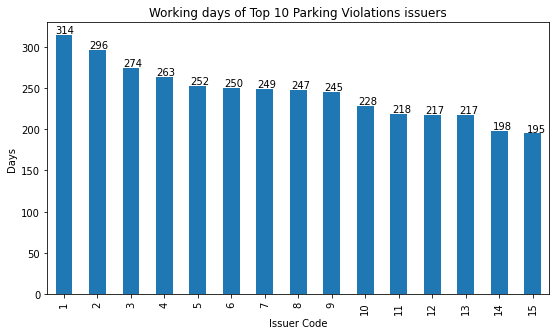

In [139]:
ax=to_plot["count"].plot(kind='bar', figsize=(9,5))
ax.set_xticklabels([i for i in range(1,16)])

plt.title('Working days of Top 15 Parking Violations issuers')
plt.xlabel('Issuer ranking')
plt.ylabel('worked days');
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))



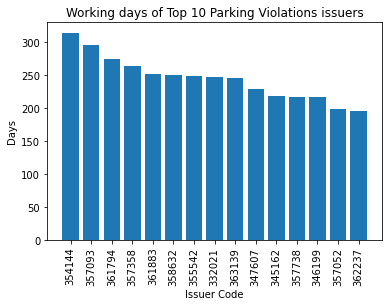

In [144]:
x_ax=list(to_plot["Issuer Code"].astype(str))
ran_x=range(len(x_ax))
plt.bar(to_plot["Issuer Code"].astype(str), to_plot["count"])
plt.xticks(ran_x, x_ax, rotation=90)
#or with issuer code 
#plt.xticks(ran_x, [i for i in range(1,16)], rotation=90)
# Add title and axis names
plt.title('Working days of Top 10 Parking Violations issuers')
plt.xlabel('Issuer Code')
plt.ylabel('Days');

In [181]:
a=df_bi.groupby("Issuer Code")["Issue Date"].nunique().reset_index(name='count_date')
#a=a.reset_index(level=["Issuer Code", 'count_date'])

b=df_bi.groupby("Issuer Code")["Summons Number"].nunique().reset_index(name='count_violations')
#b=b.reset_index(level=["Issuer Code", 'count_violations'])
# result = pd.concat([a, b], axis=1, join='inner')
# result
ratio=pd.merge(a,b,on="Issuer Code")
ratio['ratio']=ratio['count_violations']/ratio['count_date']
ratio

,Issuer Code,count_date,count_violations,ratio
0,332021,247,11765,47.631579
1,345162,218,12202,55.972477
2,346199,217,19022,87.658986
3,347607,228,15873,69.618421
4,354144,314,13524,43.070064
5,355542,249,13345,53.594378
6,357052,198,15497,78.267677
7,357093,296,11936,40.324324
8,357358,263,12132,46.129278
9,357738,217,11924,54.949309


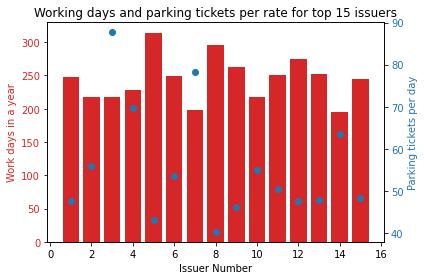

In [206]:
# Create some mock data
t = [i+1 for i in range(15)]
data1 = list(ratio.count_date)
data2 = list(ratio.ratio)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Issuer Number')
ax1.set_ylabel('Work days in a year', color=color)
ax1.bar(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Parking tickets per day', color=color)  # we already handled the x-label with ax1
ax2.scatter(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Working days and parking tickets per rate for top 15 issuers")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [201]:
#len([15-i for i in range(15)])
len([i+1 for i in range(16)])

16

In [147]:
df_bi.groupby("Issuer Code")["Summons Number"].nunique().sort_values(ascending=False)

Issuer Code
346199    19022
347607    15873
357052    15497
354144    13524
355542    13345
361794    13035
358632    12614
362237    12410
345162    12202
357358    12132
361883    12074
357093    11936
357738    11924
363139    11839
332021    11765
Name: Summons Number, dtype: int64

In [8]:
df_bi.head(7)

,Unnamed: 0,Summons Number,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Violation Precinct,Issuer Precinct,Issuer Code,...,Manhattan 96th St. & below\n(Fine Amount $),All Other Areas\n(Fine Amount $),Day Name,Day Number,month,Time,Hour,precipitation,temperature,windspeed
1574,1574,1433546693,2018-07-10,17,SUBN,CHEVR,P,79,301,345162,...,95.0,95.0,Tuesday,1,7,1900-01-01 14:25:00,14.0,0.0,27.8,14.4
1575,1575,1433546700,2018-07-10,20,SDN,TOYOT,P,77,301,345162,...,65.0,60.0,Tuesday,1,7,1900-01-01 15:00:00,15.0,0.0,27.8,14.4
1576,1576,1433546711,2018-07-10,17,SUBN,NaN,P,77,301,345162,...,95.0,95.0,Tuesday,1,7,1900-01-01 15:05:00,15.0,0.0,27.8,14.4
3622,3622,1435564443,2018-06-28,21,SDN,CHEVR,P,90,0,357052,...,65.0,45.0,Thursday,3,6,1900-01-01 02:45:00,2.0,12.7,24.3,13.3
3623,3623,1435564455,2018-06-28,21,SDN,TESLA,P,90,0,357052,...,65.0,45.0,Thursday,3,6,1900-01-01 02:50:00,2.0,12.7,24.3,13.3
3624,3624,1435564479,2018-06-28,21,SDN,TOYOT,P,90,0,357052,...,65.0,45.0,Thursday,3,6,1900-01-01 03:35:00,3.0,12.7,24.3,13.3
3625,3625,1435564492,2018-06-28,21,SDN,MAZDA,P,90,0,357052,...,65.0,45.0,Thursday,3,6,1900-01-01 03:55:00,3.0,12.7,24.3,13.3


In [9]:
df_bi['VIOLATION DESCRIPTION'].value_counts()

NO PARKING-STREET CLEANING        83159
FIRE HYDRANT                      25136
NO STANDING-DAY/TIME LIMITS       19320
NO PARKING-DAY/TIME LIMITS        14167
INSP. STICKER-EXPIRED/MISSING     10321
DOUBLE PARKING                     9002
NO STANDING-BUS STOP               6086
NO STANDING-EXC. AUTH. VEHICLE     5531
REG. STICKER-EXPIRED/MISSING       4871
FAIL TO DSPLY MUNI METER RECPT     4057
CROSSWALK                          2845
FRONT OR BACK PLATE MISSING        2711
NO STANDING-EXC. TRUCK LOADING     2584
SIDEWALK                           1632
BIKE LANE                          1006
NO STANDING-BUS LANE                909
SAFETY ZONE                         754
NON-COMPLIANCE W/ POSTED SIGN       652
NGHT PKG ON RESID STR-COMM VEH      579
EXPIRED MUNI METER                  456
OBSTRUCTING DRIVEWAY                365
COMML PLATES-UNALTERED VEHICLE      342
PLTFRM LFTS LWRD POS COMM VEH       293
NO MATCH-PLATE/STICKER              276
PARKED BUS-EXC. DESIG. AREA         255


In [10]:
df_bi['Issuing Agency'].value_counts()

T    199152
P        40
Name: Issuing Agency, dtype: int64

In [11]:
df_bi.groupby(['Issuer Code', 'VIOLATION DESCRIPTION']).count()

Unnamed: 0  Summons Number  \
Issuer Code VIOLATION DESCRIPTION                                        
332021      ALTERING INTERCITY BUS PERMIT            2               2   
            ANGLE PARKING                            6               6   
            BIKE LANE                                6               6   
            COMML PLATES-UNALTERED VEHICLE          60              60   
            CROSSWALK                              421             421   
...                                                ...             ...   
363139      REG. STICKER-EXPIRED/MISSING           151             151   
            SAFETY ZONE                             49              49   
            SIDEWALK                               106             106   
            TRAFFIC LANE                             1               1   
            WRONG WAY                                7               7   

                                            Issue Date  Violation Code  \
Issuer Code VIOLATION DESCRIPTION                                        
332021      ALTERING INTERCITY BUS PERMIT            2               2   
            ANGLE PARKING                            6               6   
            BIKE LANE                                6               6   
            COMML PLATES-UNALTERED VEHICLE          60              60   
            CROSSWALK                              421             421   
...                                                ...             ...   
363139      REG. STICKER-EXPIRED/MISSING           151             151   
            SAFETY ZONE                             49              49   
            SIDEWALK                               106             106   
            TRAFFIC LANE                             1               1   
            WRONG WAY                                7               7   

                                            Vehicle Body Type  Vehicle Make  \
Issuer Code VIOLATION DESCRIPTION                                             
332021      ALTERING INTERCITY BUS PERMIT                   2             2   
            ANGLE PARKING                                   6             6   
            BIKE LANE                                       6             6   
            COMML PLATES-UNALTERED VEHICLE                 60            60   
            CROSSWALK                                     420           420   
...                                                       ...           ...   
363139      REG. STICKER-EXPIRED/MISSING                  151           151   
            SAFETY ZONE                                    49            49   
            SIDEWALK                                      106           106   
            TRAFFIC LANE                                    1             1   
            WRONG WAY                                       7             7   

                                            Issuing Agency  \
Issuer Code VIOLATION DESCRIPTION                            
332021      ALTERING INTERCITY BUS PERMIT                2   
            ANGLE PARKING                                6   
            BIKE LANE                                    6   
            COMML PLATES-UNALTERED VEHICLE              60   
            CROSSWALK                                  421   
...                                                    ...   
363139      REG. STICKER-EXPIRED/MISSING               151   
            SAFETY ZONE                                 49   
            SIDEWALK                                   106   
            TRAFFIC LANE                                 1   
            WRONG WAY                                    7   

                                            Violation Precinct  \
Issuer Code VIOLATION DESCRIPTION                                
332021      ALTERING INTERCITY BUS PERMIT                    2   
            ANGLE PARKING                                    6   
            BIKE LA

In [45]:
df_new["Issuer Code"].value_counts()

0         730856
346199     19022
347607     15873
357052     15497
354144     13524
           ...  
922464         1
960729         1
982957         1
911537         1
949119         1
Name: Issuer Code, Length: 32234, dtype: int64

In [46]:
df_new.shape

(10368977, 28)

In [48]:
df_bi.shape

(199192, 28)

In [12]:
df_bi_bi=df_bi[df_bi["Issuer Code"]==346199]

In [13]:
df_bi_bi.shape

(19022, 29)

In [80]:
df_bi_bi=df_bi_bi.sort_values(by=['Issue Date','Hour'])

In [81]:
df_bi_bi.groupby(['Issue Date'])['Summons Number'].count()

Issue Date
2018-06-27     59
2018-06-28     75
2018-07-02    109
2018-07-03    102
2018-07-05    100
             ... 
2019-06-19     61
2019-06-20    120
2019-06-21    101
2019-06-22     84
2019-06-25    106
Name: Summons Number, Length: 217, dtype: int64

In [61]:
import matplotlib.pyplot as plt

<BarContainer object of 217 artists>

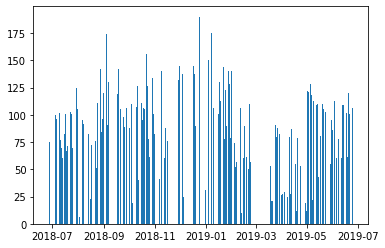

In [82]:
plt.bar(df_bi_bi.groupby(['Issue Date'])['Summons Number'].count().index,df_bi_bi.groupby(['Issue Date'])['Summons Number'].count())

In [83]:
df_bi_bi.groupby(['Issue Date','Hour'])['Summons Number'].count().index

MultiIndex([('2018-06-27',  6.0),
            ('2018-06-27',  7.0),
            ('2018-06-27',  8.0),
            ('2018-06-27',  9.0),
            ('2018-06-27', 10.0),
            ('2018-06-27', 11.0),
            ('2018-06-27', 14.0),
            ('2018-06-27', 15.0),
            ('2018-06-27', 16.0),
            ('2018-06-27', 17.0),
            ...
            ('2019-06-22',  6.0),
            ('2019-06-22',  7.0),
            ('2019-06-22',  9.0),
            ('2019-06-22', 10.0),
            ('2019-06-25',  6.0),
            ('2019-06-25',  7.0),
            ('2019-06-25',  8.0),
            ('2019-06-25',  9.0),
            ('2019-06-25', 10.0),
            ('2019-06-25', 11.0)],
           names=['Issue Date', 'Hour'], length=1697)

In [74]:
df_bi_bi.head()

,Summons Number,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,...,Manhattan 96th St. & below\n(Fine Amount $),All Other Areas\n(Fine Amount $),Day Name,Day Number,month,Time,Hour,precipitation,temperature,windspeed
860689,8681754178,2018-06-27,40,SUBN,TOYOT,T,88,88,346199,T301,...,115.0,115.0,Wednesday,2,6,1900-01-01 06:44:00,6.0,0.0,21.2,12.2
889943,8681754166,2018-06-27,71,4DSD,HYUND,T,79,79,346199,T301,...,65.0,65.0,Wednesday,2,6,1900-01-01 06:28:00,6.0,0.0,21.2,12.2
889944,8681754180,2018-06-27,46,4DSD,AUDI,T,88,88,346199,T301,...,115.0,115.0,Wednesday,2,6,1900-01-01 06:54:00,6.0,0.0,21.2,12.2
889945,8681754191,2018-06-27,46,4DSD,NISSA,T,88,88,346199,T301,...,115.0,115.0,Wednesday,2,6,1900-01-01 07:01:00,7.0,0.0,21.2,12.2
889946,8681754208,2018-06-27,14,4DSD,NISSA,T,84,84,346199,T301,...,115.0,115.0,Wednesday,2,6,1900-01-01 07:07:00,7.0,0.0,21.2,12.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10293253,8747044329,2019-06-25,21,SUBN,FORD,T,75,75,346199,T301,...,65.0,45.0,Tuesday,1,6,1900-01-01 11:50:00,11.0,NaN,NaN,NaN
9922576,8747044366,2019-06-25,21,4DSD,HONDA,T,75,75,346199,T301,...,65.0,45.0,Tuesday,1,6,1900-01-01 11:55:00,11.0,NaN,NaN,NaN
9922575,8747044354,2019-06-25,70,SUBN,CHRYS,T,75,75,346199,T301,...,65.0,65.0,Tuesday,1,6,1900-01-01 11:52:00,11.0,NaN,NaN,NaN
9922574,8747044342,2019-06-25,21,SUBN,CHRYS,T,75,75,346199,T301,...,65.0,45.0,Tuesday,1,6,1900-01-01 11:52:00,11.0,NaN,NaN,NaN


In [93]:
df_bi_bii=df_bi_bi.groupby(['Issue Date','Hour']).count()
df_bi_bii.head()
#df_bi_bii.agg({'Hour': {'mindate': np.min, 'maxdate': np.max}})

Summons Number  Violation Code  Vehicle Body Type  \
Issue Date Hour                                                      
2018-06-27 6.0                3               3                  3   
           7.0                3               3                  3   
           8.0                2               2                  2   
           9.0                2               2                  2   
           10.0              12              12                 12   

                 Vehicle Make  Issuing Agency  Violation Precinct  \
Issue Date Hour                                                     
2018-06-27 6.0              3               3                   3   
           7.0              3               3                   3   
           8.0              2               2                   2   
           9.0              2               2                   2   
           10.0            12              12                  12   

                 Issuer Precinct  Issuer Code  Issuer Command  Issuer Squad  \
Issue Date Hour                                                               
2018-06-27 6.0                 3            3               3             3   
           7.0                 3            3               3             3   
           8.0                 2            2               2             2   
           9.0                 2            2               2             2   
           10.0               12           12              12            12   

                 ...  VIOLATION DESCRIPTION  \
Issue Date Hour  ...                          
2018-06-27 6.0   ...                      3   
           7.0   ...                      3   
           8.0   ...                      2   
           9.0   ...                      2   
           10.0  ...                     12   

                 Manhattan  96th St. & below\n(Fine Amount $)  \
Issue Date Hour                                                 
2018-06-27 6.0                                              3   
           7.0                                              3   
           8.0                                              2   
           9.0                                              2   
           10.0                                            12   

                 All Other Areas\n(Fine Amount $)  Day Name  Day Number  \
Issue Date Hour                                                           
2018-06-27 6.0                                  3         3           3   
           7.0                                  3         3           3   
           8.0                                  2         2           2   
           9.0                                  2         2           2   
           10.0                                12        12          12   

                 month  Time  precipitation  temperature  windspeed  
Issue Date Hour                                                      
2018-06-27 6.0       3     3              3            3          3  
           7.0       3     3              3            3          3  
           8.0       2     2              2            2          2  
           9.0       2     2              2            2          2  
           10.0     12    12             12           12         12  

[5 rows x 26 columns]

In [111]:
df_ap=pd.DataFrame({"Issuer Code":[0],"Issue Date":[0],"Hours":[0]})
for bi in best_issuers:
    a = df_bi[df_bi["Issuer Code"]==bi]
    datelist=a["Issue Date"].unique()
    for d in datelist:
        day = a[a["Issue Date"]==d]
        maxh=max(day["Hour"])
        minh=min(day["Hour"])
        interv=maxh-minh
        df_to=pd.DataFrame({"Issuer Code":[int(bi)],"Issue Date":[d],"Hours":[interv]})
        df_ap=df_ap.append(df_to,ignore_index=True)
        

In [112]:
df_ap.head()

,Issuer Code,Issue Date,Hours
0,0,0,0.0
1,346199,2018-06-27 00:00:00,11.0
2,346199,2018-06-28 00:00:00,6.0
3,346199,2018-07-02 00:00:00,12.0
4,346199,2018-07-03 00:00:00,11.0


In [113]:
df_ap["Hours"].value_counts()

5.0     1095
6.0      915
4.0      349
10.0     185
9.0      182
3.0      175
11.0     171
23.0     156
8.0      140
12.0      94
7.0       82
2.0       61
1.0       19
22.0      17
0.0       10
21.0       6
13.0       3
14.0       2
16.0       1
20.0       1
Name: Hours, dtype: int64

In [117]:
df_ap[df_ap["Hours"]==23.0]["Issuer Code"].value_counts()

354144    156
Name: Issuer Code, dtype: int64

In [119]:
df_ap[df_ap["Hours"]==22.0]["Issuer Code"].value_counts()

354144    17
Name: Issuer Code, dtype: int64

In [120]:
df_ap[df_ap["Hours"]==21.0]["Issuer Code"].value_counts()

354144    6
Name: Issuer Code, dtype: int64

In [121]:
df_ap[df_ap["Hours"]==20.0]["Issuer Code"].value_counts()

354144    1
Name: Issuer Code, dtype: int64

In [122]:
df_ap[df_ap["Hours"]==19.0]["Issuer Code"].value_counts()

Series([], Name: Issuer Code, dtype: int64)

In [123]:
df_ap[df_ap["Hours"]==18.0]["Issuer Code"].value_counts()

Series([], Name: Issuer Code, dtype: int64)

In [124]:
df_ap[df_ap["Hours"]==17.0]["Issuer Code"].value_counts()

Series([], Name: Issuer Code, dtype: int64)

In [131]:
vio = df_bi[df_bi['Issuer Code']==354144]['VIOLATION DESCRIPTION'].value_counts()

vio.index.to_list()[:10]

['FIRE HYDRANT',
 'NO STANDING-DAY/TIME LIMITS',
 'NO PARKING-STREET CLEANING',
 'NO PARKING-DAY/TIME LIMITS',
 'FAIL TO DSPLY MUNI METER RECPT',
 'NO STANDING-BUS STOP',
 'DOUBLE PARKING',
 'NGHT PKG ON RESID STR-COMM VEH',
 'INSP. STICKER-EXPIRED/MISSING',
 'FRONT OR BACK PLATE MISSING']

In [129]:
data

,date,precipitation,temperature,windspeed
0,2018-04-01,0.0,10.6,18.7
1,2018-04-02,14.2,4.0,11.2
2,2018-04-03,5.8,3.9,7.9
3,2018-04-04,1.5,7.8,25.6
4,2018-04-05,0.0,4.9,26.3
...,...,...,...,...
360,2019-03-27,0.0,3.8,12.2
361,2019-03-28,0.0,5.2,10.1
362,2019-03-29,0.0,10.5,10.4
363,2019-03-30,0.0,14.2,14.0
